**Overfitting:** Good performance on the training data, poor generliazation to other data.

**Underfitting:** Poor performance on the training data and poor generalization to other data.



![alt text](https://i.pinimg.com/474x/e2/c0/6f/e2c06fd25d27f1d7ec03fbc3211e3498.jpg)



**Bias:** 

The bias is known as the difference between the prediction of the values by the ML model and the correct value. Being high in biasing gives a large error in training as well as testing data. 

Its recommended that an algorithm should always be low biased to avoid the problem of underfitting.

By high bias, the data predicted is in a straight line format, thus not fitting accurately in the data in the data set. Such fitting is known as Underfitting of Data. 

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20200107015710/HighBias.jpg)

**Variance:** 

Variance tells us how scattered are the predicted value from the actual value

Variance occurs when the model performs good on the trained dataset but does not do well on a dataset that it is not trained on, like a test dataset or validation dataset.

High variance causes overfitting that implies that the algorithm models random noise present in the training data.

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20200107021651/High-Var.jpg)


![alt text](https://miro.medium.com/max/1400/1*gy5zEJ2_QfhKMNc3BAjLSA.png)

![alt text](https://datasciencetutor.com/wp-content/uploads/2019/07/error-768x119.png)

![alt text](https://miro.medium.com/max/562/1*RQ6ICt_FBSx6mkAsGVwx8g.png)

**Bias Variance Tradeoff**

If the algorithm is too simple (hypothesis with linear eq.) then it may be on high bias and low variance condition and thus is error-prone. 

If algorithms fit too complex ( hypothesis with high degree eq.) then it may be on high variance and low bias. 

In the latter condition, the new entries will not perform well. Well, there is something between both of these conditions, known as Trade-off or Bias Variance Trade-off.

![alt text](https://miro.medium.com/max/468/1*xwtSpR_zg7j7zusa4IDHNQ.png)

High bias is due to a simple model and we also see a high training error. To fix that we can do following things

1. Add more input features

2. Add more complexity by introducing polynomial features

3. Decrease Regularization term

High variance is due to a model that tries to fit most of the training dataset points and hence gets more complex. To resolve high variance issue we need to work on

1. Getting more training data

2. Reduce input features

3. Increase Regularization term

Regularization is a technique where we penalize the loss function for a complex model which is very flexible. This helps with overfitting. It does this by penalizing the different parameters or weights to reduce the noise of the training data and generalize well on the test data
Regularization significantly reduces the variance without substantially increasing bias.

Lasso, Ridge Regression, and Elastic Net are modifications of ordinary least squares linear regression, which use additional penalty terms in the cost function to keep coefficient values small and simplify the model.

Lasso is useful for feature selection, when our dataset has features with poor predictive power.

Ridge regression is useful for the grouping effect, in which colinear features can be selected together.

Elastic Net combines Lasso and ridge regression, potentially leading to a model that is both simple and predictive.

**They are three types of regularization technique to overcome overfitting**.

a) L1 regularization (also called Lasso regularization / panelization.)

b) L2 regularization (also called Ridege regularization/ penalization.)

c) Elastic net

**Ridege and Lasso Regularization:** 


Loss function is the sum of squared difference between the actual value and the predicted value

![alt text](https://miro.medium.com/max/1400/1*ktraE58N3fMNMXtaC49CTw.png)
 **Loss function for a linear regression with 4 input variables. In the equation i=4**



where the difference between the actual value of y and the predicted value is called the error term.


![alt text](https://www.andreaperlato.com/img/ridge.png)


Both of these techniques use an additional term called penalties in their cost function

**Ridge regression cost function:**

L2 regularization penalizes sum of square weights.

![alt text](https://miro.medium.com/max/1240/1*6v8U-5NwcWrQ1mKiTfYz6Q.png)

λ is the penalty term or regularization parameter which determines how much to penalizes the weights.

**Lasso regression cost function:**

It is generally used when we have more number of features, because it automatically does feature selection.

L1 penalizes sum of absolute value of weights.

![alt text](https://miro.medium.com/max/1262/1*6dfxa-smu8nRZwiFkSwriA.png)

In [33]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df=load_boston()

In [35]:
dataset = pd.DataFrame(df.data)

In [36]:
dataset.columns=df.feature_names

In [37]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
dataset["Price"]=df.target

In [39]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

**Linear Regression**

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-37.131807467699055


**Ridge Regression**

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [43]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540344


**Lasso Regression**

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2542.94634

{'alpha': 1}
-35.531580220694856


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Coefficent for linear Regression**

In [46]:
lin_regressor.fit(X_train, y_train)
# Putting together the coefficient and their corrsponding variable names  
lin_coefficient = pd.DataFrame() 
lin_coefficient["Columns"] = X.columns 
lin_coefficient['Coefficient Estimate'] = pd.Series(lin_regressor.coef_) 
print(lin_coefficient) 

    Columns  Coefficient Estimate
0      CRIM             -0.121310
1        ZN              0.044466
2     INDUS              0.011342
3      CHAS              2.511246
4       NOX            -16.231253
5        RM              3.859068
6       AGE             -0.009985
7       DIS             -1.500270
8       RAD              0.242143
9       TAX             -0.011072
10  PTRATIO             -1.017753
11        B              0.006814
12    LSTAT             -0.486738


***Ridge Regression coefficient***


In [47]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
# Train the model  
ridge_regressor = Ridge(alpha = 100) 
ridge_regressor.fit(X_train, y_train) 
# Putting together the coefficient and their corrsponding variable names  
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"] = X.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge_regressor.coef_) 
print(ridge_coefficient) 

    Columns  Coefficient Estimate
0      CRIM             -0.109848
1        ZN              0.053624
2     INDUS             -0.052950
3      CHAS              0.483850
4       NOX             -0.163749
5        RM              1.972206
6       AGE             -0.005280
7       DIS             -1.183078
8       RAD              0.253968
9       TAX             -0.014718
10  PTRATIO             -0.912937
11        B              0.007424
12    LSTAT             -0.645917


**Lasso Regression Coefficient:**

Lasso regression can completely eliminate the variable by reducing its coefficient value to 0.

In [48]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Lasso 
# Train the model  
l_regressor = Lasso(alpha = 1) 
l_regressor.fit(X_train, y_train) 
# Putting together the coefficient and their corrsponding variable names  
l_coefficient = pd.DataFrame() 
l_coefficient["Columns"] = X.columns 
l_coefficient['Coefficient Estimate'] = pd.Series(l_regressor.coef_) 
print(l_coefficient) 

    Columns  Coefficient Estimate
0      CRIM             -0.065862
1        ZN              0.048329
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.868985
6       AGE              0.012180
7       DIS             -0.751094
8       RAD              0.200074
9       TAX             -0.013951
10  PTRATIO             -0.846024
11        B              0.006688
12    LSTAT             -0.732666


**Elastic Net Coefficient:**


In [49]:
# import model 
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(alpha = 1) 
e_net.fit(X_train, y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

Mean Squared Error on test set 31.87361081774105


In [51]:
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

,Columns,Coefficient Estimate
0,CRIM,-0.083444
1,ZN,0.051794
2,INDUS,-0.017025
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.908910
6,AGE,0.012190
7,DIS,-0.830108
8,RAD,0.235582
9,TAX,-0.015024


In [52]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

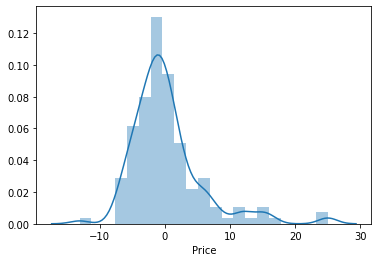

In [53]:

import seaborn as sns

sns.distplot(y_test-prediction_lasso)

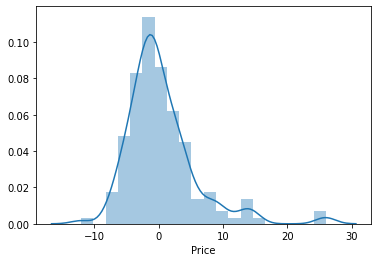

In [54]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)